### Task: Run and analyze an existing cellular automaton

* The code below implements the traffic simulator you saw in the previous activity.
* We use Sayama's pycxsimulator library to step through the cellular automaton simulation, which means that you can run this same code on your own computer.
* Run the code below.


In [18]:
interactive = False  # Set this variable to True to run an interactive
                     # simulator. This will not work on CoCalc.

import matplotlib


import pylab
import random
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [4]:
a = list([0]*100)
a[0] =1
print(a)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [58]:
class TrafficSimulator(object):

    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 184.

    def __init__(self, length=50, density=0.2, interactive=False, pdown = 0.1, v_max = 5):

        self.interactive = interactive
        self.length = length
        self.density = density
        self.v_max = v_max
        self.pdown = pdown
        self.count = 0



        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = list([0]*self.length)
        self.next_state = list([0]*self.length)

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
#         np.random.seed(30)
        random_indices = np.random.choice(
            range(self.length),
            size=int(round((1-self.density) * self.length)),
            replace=False)
        for i in random_indices:
            self.current_state[i] = -1
            self.next_state[i] = -1
        

        self.time = 0

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        print(''.join('.' if x == -1 else str(int(x)) for x in self.current_state))


    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        self.next_state = np.zeros(self.length)
        self.next_state.fill(-1)
#         print('sdfsadfsafasfas', self.current_state)
        for i in range(0, self.length):

            if self.current_state[i] == -1:
                pass
            else:
                new_speed = self.current_state[i]
                space = 0
                #find space
                for j in range(1,7):
                    if self.current_state[(i+j)%self.length] == -1:
                        space += 1
                    else:
                        space += 1
                        break
                

                    #remain max speed
                if self.current_state[i] == self.v_max and space > self.v_max:
                    new_speed = self.current_state[i]

                    #accelerate
                elif self.current_state[i] < self.v_max:
                    if space > self.current_state[i] + 1:
                        new_speed = self.current_state[i] + 1
                    #decelerate
                    elif space == self.current_state[i] + 1: 
                        new_speed = self.current_state[i]
                    elif space <= self.current_state[i] and new_speed > 0:
                        new_speed =  space - 1
                    #randomized slowing down
                if rd.random() <= self.pdown and self.current_state[i] > 0:
                    new_speed = self.current_state[i] - 1
                #print(i, self.current_state[i], space, new_speed)
            #update vehicles
#                 self.next_state[i] = -1
                self.next_state[int(i+new_speed)%self.length] = new_speed
                
                if i+new_speed >= self.length:
                    self.count += 1
                #print('current state isss:', self.current_state)
                #print('self.next_state isssssssss', self.next_state)

        #assign next state to current state
        self.current_state, self.next_state = self.next_state, self.current_state 
        self.time += 1
        #return(self.current_state)

#         self.current_state, self.next_state = self.next_state, self.current_state
#         self.time += 1


In [59]:
sim = TrafficSimulator(density=0.3,length = 10, v_max = 5 ,interactive=interactive)



    # Run the simulator for 100 steps and show some of the steps.:
print('Initial state:')
sim.initialize()
# sim.step()
# sim.draw()
# print(sim.current_state)

print('Next 100 states:')
for i in range(100):
#     print('current state isss:', sim.current_state)
    sim.step()
#     print("sim.next_state isssss",sim.next_state)
sim.draw()
print(sim.count/100)

#     print('After 100 steps:')
#     for i in range(95):
#         sim.step()
#     sim.draw()


Initial state:
Next 100 states:
.20.....3.
0.56


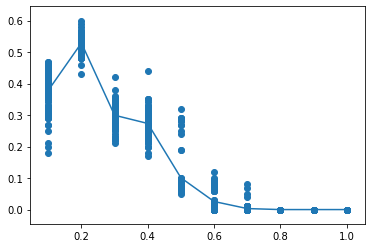

In [50]:
potential_density = [i/10 for i in range(1,11,1)]
density = []
flow = []
ave_flow = []
for p in potential_density: #try various values of density 100 times
    density += [p]*100 #x axis of the scatter plot. *100 as we simulates every 100 steps 100 times
    for _ in range(100):
        sim = TrafficSimulator(density=p,length = 10, interactive=interactive)
        sim.initialize()
        sim.count = 0
        for i in range(100):
            sim.step()
        flow.append(sim.count/100)
    ave_flow.append(sum(flow[-100:])/100)

plt.scatter(density,flow)
plt.plot(potential_density,ave_flow)

In [48]:
a = [2,3,4,5,5]
a[-3:]

[4, 5, 5]